# TP10 - PCA

In [ ]:
# -*- coding: utf-8 -*-

# Authors: Vlad Niculae, Alexandre Gramfort, Slim Essid
# License: BSD

In [8]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition, datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.feature_extraction import text
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import make_pipeline

### Question 1

In [2]:
# Prepare data and define utility functions
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = np.random.RandomState(0)

In [3]:
# Load faces data
dataset = fetch_olivetti_faces(data_home='c:/tmp/', shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

In [4]:
# Global centering
faces_centered = faces - faces.mean(axis=0).astype(np.float64)

print(f"Dataset consists of {n_samples} faces")

Dataset consists of 400 faces


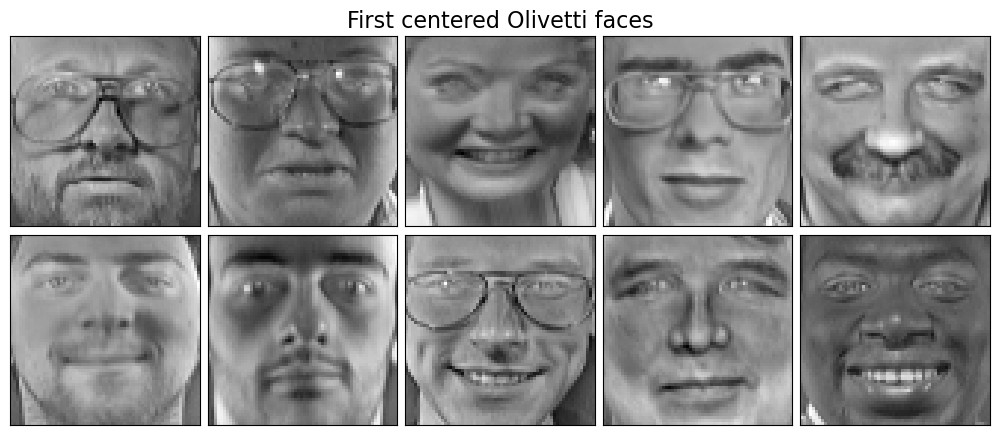

In [5]:
def plot_gallery(title, images):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp, cmap='gray', interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)


# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Extracting the top 10 Eigenfaces - PCA...
done in 0.135s
Extracting the top 10 Non-negative components - NMF...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


done in 4.064s


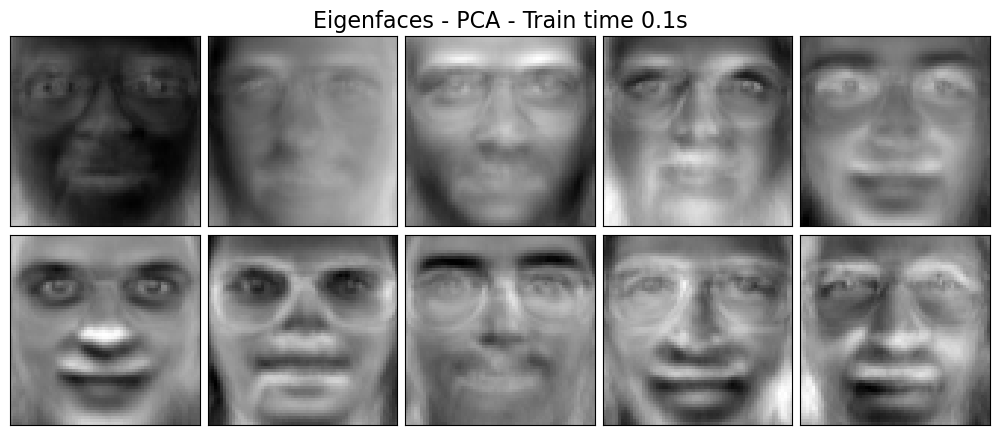

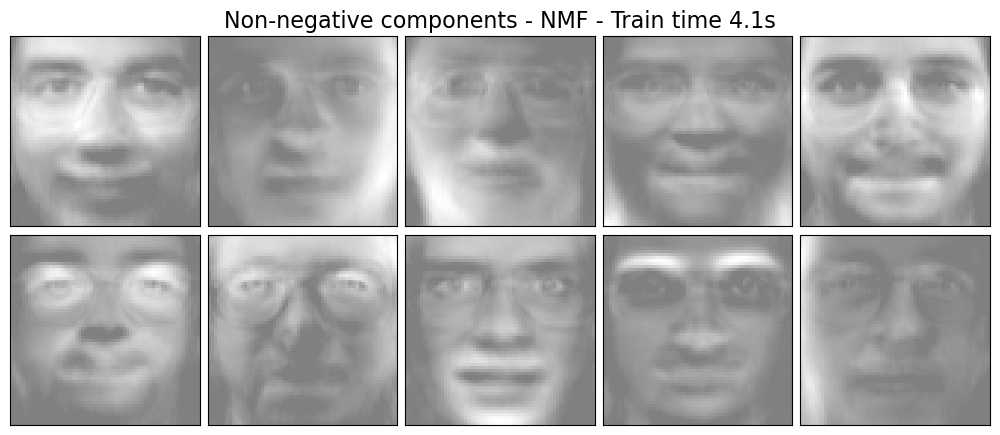

In [6]:
# Decomposition methods
estimators = [
    ('PCA', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True), True),
    ('NMF', 'Non-negative components - NMF', decomposition.NMF(n_components=n_components,
     init='nndsvd', tol=1e-6, max_iter=1000), False)
]

# Transform and classify
labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    print(f"Extracting the top {n_components} {name}...")
    t0 = time()

    data = X_ if center else X
    data = estimator.fit_transform(data)

    train_time = time() - t0
    print(f"done in {train_time:.3f}s")

    components_ = estimator.components_

    plot_gallery(f'{name} - Train time {train_time:.1f}s',
                 components_[:n_components])

### Question 2

Evaluating with 10 components...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

PCA average score: 0.8450, NMF average score: 0.8625
Evaluating with 15 components...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

PCA average score: 0.9225, NMF average score: 0.9150
Evaluating with 25 components...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

PCA average score: 0.9750, NMF average score: 0.9700
Evaluating with 50 components...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

PCA average score: 0.9750, NMF average score: 0.9700
Evaluating with 100 components...


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  

PCA average score: 0.9800, NMF average score: 0.9675


/Users/alban/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


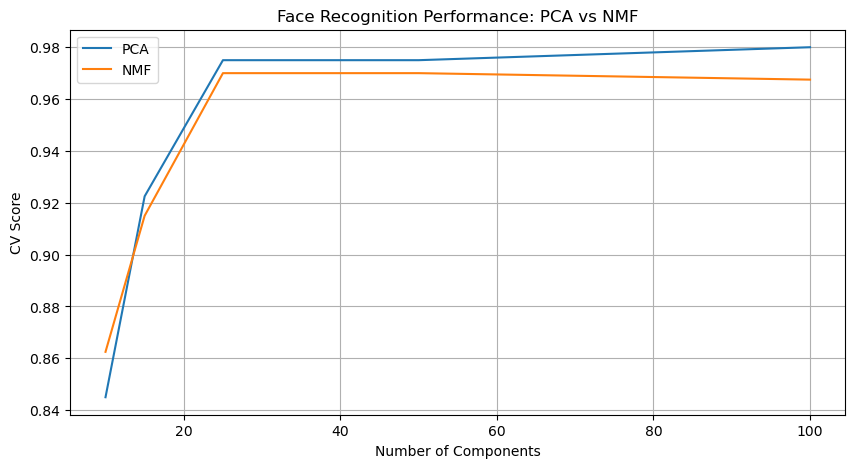

In [7]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=np.random.RandomState(0))
faces = dataset.data
labels = dataset.target

# Define the range of components to be evaluated
n_components_range = [10, 15, 25, 50, 100]
scores_pca = []
scores_nmf = []

for n_components in n_components_range:
    print(f"Evaluating with {n_components} components...")

    # PCA
    pca = PCA(n_components=n_components, whiten=True)
    lda = LDA()
    model_pca = make_pipeline(pca, lda)
    scores = cross_val_score(model_pca, faces, labels, cv=5)
    scores_pca.append(scores.mean())

    # NMF
    nmf = NMF(n_components=n_components, init='nndsvd', random_state=0)
    model_nmf = make_pipeline(nmf, lda)
    scores = cross_val_score(model_nmf, faces, labels, cv=5)
    scores_nmf.append(scores.mean())

    print(f"PCA average score: {scores_pca[-1]:.4f}, NMF average score: {scores_nmf[-1]:.4f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, scores_pca, label='PCA')
plt.plot(n_components_range, scores_nmf, label='NMF')
plt.xlabel('Number of Components')
plt.ylabel('CV Score')
plt.legend()
plt.title('Face Recognition Performance: PCA vs NMF')
plt.grid(True)
plt.show()

### Question 3

In [9]:
n_samples = 1000
n_features = 900
n_topics = 10
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)
t0 = time()
print("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home='c:/tmp/', shuffle=True, random_state=1)
vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features)
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..." % (n_samples, n_features))
t1 = time()  # Correction: Start time for fitting NMF model
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print("done in %0.3fs." % (time() - t1))  # Correction: Time since t1

# Inverse the vectorizer vocabulary to be able to access feature names
feature_names = vectorizer.get_feature_names_out()  # Updated for newer sklearn versions

# Display the topics
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Loading dataset and extracting TF-IDF features...
done in 8.063s.
Fitting the NMF model with n_samples=1000 and n_features=900...
done in 0.421s.
Topic #0:
the of in and on was to as at is which by were one with for they that when two
Topic #1:
chip clipper key the to encryption keys government be will this public as is or of can that it use
Topic #2:
is that of to not are and the we in as be people they it this there or god their
Topic #3:
edu university host posting cs nntp of re in article cc writes reply distribution washington cwru state mit for anyone
Topic #4:
com hp in article writes inc netcom corp stratus re sun posting nntp host dec ca jim org that corporation
Topic #5:
he his was to and him that who the had my in it but year this ca me team be
Topic #6:
uk ac co of university ___ dc posting host nntp thanks __ sorry college it please where return sun writes
Topic #7:
you to it your my have can if do and that car get like with don on what just so
Topic #8:
nasa gov space cen